# Outline
1. There're lots of features for analysis, therefore preprocessing is necessary and important.  
2. This notebook contains Heatmaps and Barplots for EDA.  
3. Also, there're classic regression models for predicting Crime Codes ('Crm Cd' in DataFrame.)

# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMRegressor

In [2]:
# Unzip archive
!Unzip -o archive.zip

Archive:  archive.zip
  inflating: Crime_Data_from_2020_to_Present.csv  


In [3]:
# Load data
crimes = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317849,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
317850,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
317851,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
317852,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


## Dataset Overview
|     Columns    |                                                                                                                                                    Description                                                                                                                                                   |
|:--------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|      DR_NO     | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits                                                                                                                                                                                                                |
|    Date Rptd   | MM/DD/YYYY                                                                                                                                                                                                                                                                                                       |
|    DATE OCC    | MM/DD/YYYY                                                                                                                                                                                                                                                                                                       |
|    TIME OCC    | In 24 hour military time.                                                                                                                                                                                                                                                                                        |
|      AREA      | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.                                                                                                                                                     |
|    AREA NAME   | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
|   Rpt Dist No  | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a7                                   |
|    Part 1-2    | Number                                                                                                                                                                                                                                                                                                           |
|     Crm Cd     | Indicates the crime committed. (Same as Crime Code 1)                                                                                                                                                                                                                                                            |
|   Crm Cd Desc  | Defines the Crime Code provided.                                                                                                                                                                                                                                                                                 |
|     Mocodes    | Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20or                           |
| Vict Age       | Two character numeric                                                                                                                                                                                                                                                                                            |
| Vict Sex       | F - Female M - Male X - Unknown                                                                                                                                                                                                                                                                                  |
| Vict Descent   | Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian      |
| Premis Cd      | The type of structure, vehicle, or location where the crime took place.                                                                                                                                                                                                                                          |
| Premis Desc    | Defines the Premise Code provided.                                                                                                                                                                                                                                                                               |
| Weapon Used Cd | The type of weapon used in the crime.                                                                                                                                                                                                                                                                            |
| Weapon Desc    | Defines the Weapon Used Code provided.                                                                                                                                                                                                                                                                           |
| Status         | Status of the case. (IC is the default)                                                                                                                                                                                                                                                                          |
| Status Desc    | Defines the Status Code provided.                                                                                                                                                                                                                                                                                |
| Crm Cd 1       | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.                                                                                                                      |
| Crm Cd 2       | May contain a code for an additional crime, less serious than Crime Code 1.                                                                                                                                                                                                                                      |
| Crm Cd 3       | May contain a code for an additional crime, less serious than Crime Code 1.                                                                                                                                                                                                                                      |
| Crm Cd 4       | May contain a code for an additional crime, less serious than Crime Code 1.                                                                                                                                                                                                                                      |
| LOCATION       | Street address of crime incident rounded to the nearest hundred block to maintain anonymity.                                                                                                                                                                                                                     |
| Cross Street   | Cross Street of rounded Address                                                                                                                                                                                                                                                                                  |
| LAT            | Latitude                                                                                                                                                                                                                                                                                                         |
| LON            | Longtitude                                                                                                                                                                                                                                                                                                       |

# Data Preprocessing

In [4]:
# Drop unnecessary columns
crimes.drop(['DR_NO', 'Date Rptd', 'Rpt Dist No' , 'Part 1-2', 'Mocodes', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LOCATION'], axis=1, inplace=True)
crimes

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,1230,12,77th Street,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,33.9739,-118.2630
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317849,03/19/2021 12:00:00 AM,1105,12,77th Street,510,VEHICLE - STOLEN,0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,33.9897,-118.2827
317850,03/04/2021 12:00:00 AM,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814
317851,07/09/2021 12:00:00 AM,1050,17,Devonshire,624,BATTERY - SIMPLE ASSAULT,40,M,H,501.0,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.2302,-118.4775
317852,07/12/2021 12:00:00 AM,1200,3,Southwest,350,"THEFT, PERSON",15,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,34.0088,-118.3351


In [5]:
# Check whether 'crimes' contains any Null or NaN values
crimes.isnull().sum()

DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
LAT                    0
LON                    0
dtype: int64

In [6]:
# Drop rows contains missing values
crimes.dropna(axis=0, inplace=True)
crimes.reset_index(drop=True, inplace=True)
crimes

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545
2,01/01/2020 12:00:00 AM,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534
3,09/12/2020 12:00:00 AM,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916
4,01/04/2020 12:00:00 AM,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,03/05/2021 12:00:00 AM,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750
116396,05/25/2021 12:00:00 AM,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391
116397,07/04/2021 12:00:00 AM,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296
116398,03/04/2021 12:00:00 AM,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814


In [7]:
# Split 'DATE OCC' into year, month and day.
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['YEAR OCC'] = crimes['DATE OCC'].dt.year
crimes['MONTH OCC'] = crimes['DATE OCC'].dt.month
crimes['DAY OCC'] = crimes['DATE OCC'].dt.day
crimes

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,YEAR OCC,MONTH OCC,DAY OCC
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,2020,1,8
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,2020,1,1
2,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,2020,1,1
3,2020-09-12,30,18,Southeast,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,33.9019,-118.2916,2020,9,12
4,2020-01-04,2200,1,Central,330,BURGLARY FROM VEHICLE,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,34.0359,-118.2648,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021-03-05,915,2,Rampart,624,BATTERY - SIMPLE ASSAULT,54,F,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0593,-118.2750,2021,3,5
116396,2021-05-25,813,6,Hollywood,624,BATTERY - SIMPLE ASSAULT,33,M,B,135.0,MTA PROPERTY OR PARKING LOT,512.0,MACE/PEPPER SPRAY,IC,Invest Cont,34.1016,-118.3391,2021,5,25
116397,2021-07-04,2135,21,Topanga,624,BATTERY - SIMPLE ASSAULT,44,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.1855,-118.6296,2021,7,4
116398,2021-03-04,2210,5,Harbor,434,FALSE IMPRISONMENT,41,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,33.7424,-118.2814,2021,3,4


In [8]:
# Relocate columns
crimes_desc = crimes[['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc']]
crimes = crimes[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status']]
crimes

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status
0,2020,1,8,2230,3,Southwest,624,36,F,B,501.0,400.0,AO
1,2020,1,1,330,1,Central,624,25,M,H,102.0,500.0,IC
2,2020,1,1,30,1,Central,121,25,F,H,735.0,500.0,IC
3,2020,9,12,30,18,Southeast,930,21,F,B,101.0,511.0,IC
4,2020,1,4,2200,1,Central,330,29,M,A,101.0,306.0,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116395,2021,3,5,915,2,Rampart,624,54,F,H,101.0,500.0,IC
116396,2021,5,25,813,6,Hollywood,624,33,M,B,135.0,512.0,IC
116397,2021,7,4,2135,21,Topanga,624,44,M,W,101.0,400.0,IC
116398,2021,3,4,2210,5,Harbor,434,41,F,B,502.0,200.0,AA


In [9]:
# Extract data for plotting distribution
crimes_distribution = crimes.iloc[:, [1, 2, 3, 4, 6, 7, 10, 11]]
crimes_distribution

,MONTH OCC,DAY OCC,TIME OCC,AREA,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd
0,1,8,2230,3,624,36,501.0,400.0
1,1,1,330,1,624,25,102.0,500.0
2,1,1,30,1,121,25,735.0,500.0
3,9,12,30,18,930,21,101.0,511.0
4,1,4,2200,1,330,29,101.0,306.0
...,...,...,...,...,...,...,...,...
116395,3,5,915,2,624,54,101.0,500.0
116396,5,25,813,6,624,33,135.0,512.0
116397,7,4,2135,21,624,44,101.0,400.0
116398,3,4,2210,5,434,41,502.0,200.0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

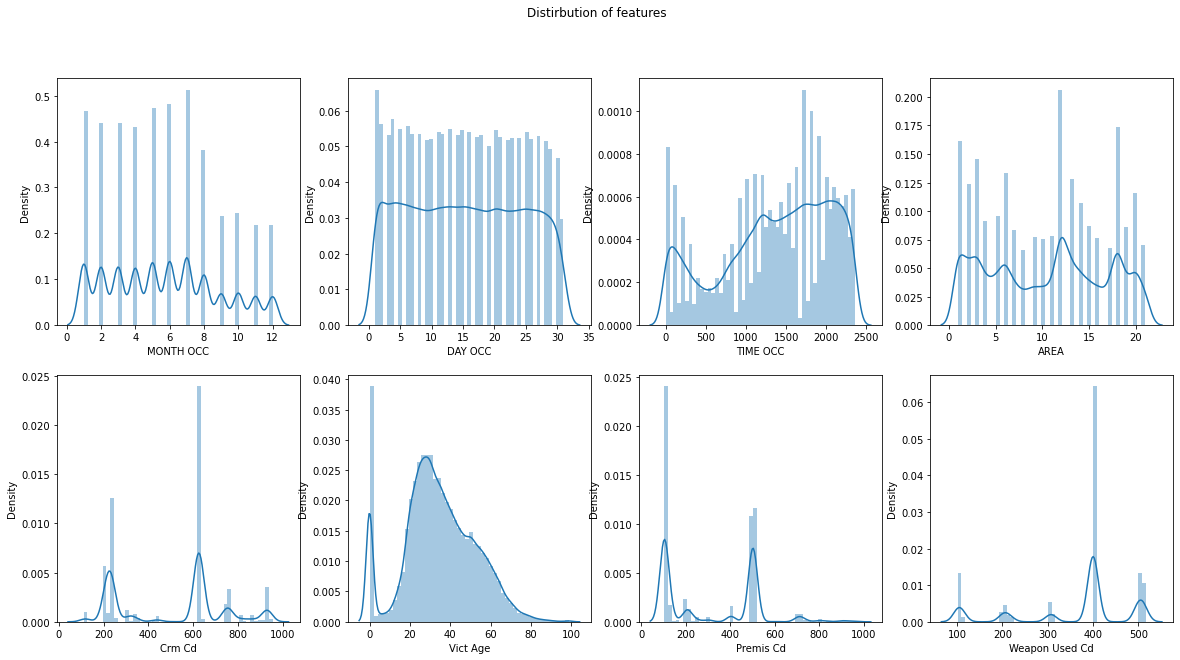

In [10]:
# Check distribution of each features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(crimes_distribution.columns):
    row = int(i/4)
    col = i%4
    sns.distplot(crimes_distribution.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

## Description
As you can see those plots, features in 'crimes' are much less biased, considering non-preprocessed  
But, 'Crm Cd', 'Premis Cd' and 'Weapon Used Cd' seem to be needed for log transformation  
Additionally, 'Vict Age' which contains value of '0' are meaningless, so dropping those could be a good idea

In [11]:
# Drop 'Vict Age' which value is '0'
Vict_Age_0 = crimes[crimes['Vict Age'] == 0].index
crimes.drop(Vict_Age_0, inplace=True)
crimes.reset_index(drop=True, inplace=True)
crimes

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status
0,2020,1,8,2230,3,Southwest,624,36,F,B,501.0,400.0,AO
1,2020,1,1,330,1,Central,624,25,M,H,102.0,500.0,IC
2,2020,1,1,30,1,Central,121,25,F,H,735.0,500.0,IC
3,2020,9,12,30,18,Southeast,930,21,F,B,101.0,511.0,IC
4,2020,1,4,2200,1,Central,330,29,M,A,101.0,306.0,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107453,2021,3,5,915,2,Rampart,624,54,F,H,101.0,500.0,IC
107454,2021,5,25,813,6,Hollywood,624,33,M,B,135.0,512.0,IC
107455,2021,7,4,2135,21,Topanga,624,44,M,W,101.0,400.0,IC
107456,2021,3,4,2210,5,Harbor,434,41,F,B,502.0,200.0,AA


In [12]:
# Log Transformation
Crm_Cd_Log = np.log1p(crimes['Crm Cd'])
Premis_Cd_Log = np.log1p(crimes['Premis Cd'])
Weapon_Used_Cd_Log = np.log1p(crimes['Weapon Used Cd'])

crimes.insert(7, 'Crm Cd Log', Crm_Cd_Log)
crimes.insert(12, 'Premis Cd Log', Premis_Cd_Log)
crimes.insert(14, 'Weapon Used Cd Log', Weapon_Used_Cd_Log)

crimes

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Log,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Status
0,2020,1,8,2230,3,Southwest,624,6.437752,36,F,B,501.0,6.218600,400.0,5.993961,AO
1,2020,1,1,330,1,Central,624,6.437752,25,M,H,102.0,4.634729,500.0,6.216606,IC
2,2020,1,1,30,1,Central,121,4.804021,25,F,H,735.0,6.601230,500.0,6.216606,IC
3,2020,9,12,30,18,Southeast,930,6.836259,21,F,B,101.0,4.624973,511.0,6.238325,IC
4,2020,1,4,2200,1,Central,330,5.802118,29,M,A,101.0,4.624973,306.0,5.726848,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107453,2021,3,5,915,2,Rampart,624,6.437752,54,F,H,101.0,4.624973,500.0,6.216606,IC
107454,2021,5,25,813,6,Hollywood,624,6.437752,33,M,B,135.0,4.912655,512.0,6.240276,IC
107455,2021,7,4,2135,21,Topanga,624,6.437752,44,M,W,101.0,4.624973,400.0,5.993961,IC
107456,2021,3,4,2210,5,Harbor,434,6.075346,41,F,B,502.0,6.220590,200.0,5.303305,AA


In [13]:
# Check distribution of columns log transformation processed
crimes_distribution_log = crimes[['Crm Cd Log', 'Premis Cd Log', 'Weapon Used Cd Log']]
crimes_distribution_log

,Crm Cd Log,Premis Cd Log,Weapon Used Cd Log
0,6.437752,6.218600,5.993961
1,6.437752,4.634729,6.216606
2,4.804021,6.601230,6.216606
3,6.836259,4.624973,6.238325
4,5.802118,4.624973,5.726848
...,...,...,...
107453,6.437752,4.624973,6.216606
107454,6.437752,4.912655,6.240276
107455,6.437752,4.624973,5.993961
107456,6.075346,6.220590,5.303305


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

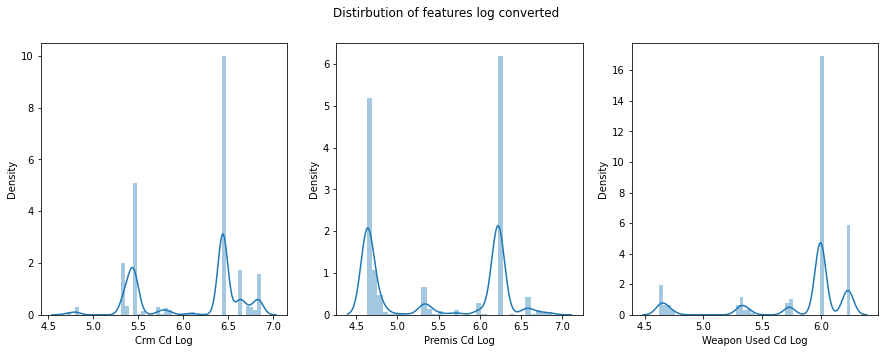

In [14]:
# Check distribution of each features
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(crimes_distribution_log.columns):
    col = i%3
    sns.distplot(crimes_distribution_log.iloc[:, i], ax=axs[col])

plt.suptitle('Distirbution of features log converted')
plt.tight_layout

# Visualization

<AxesSubplot:title={'center':'Correlation of features'}>

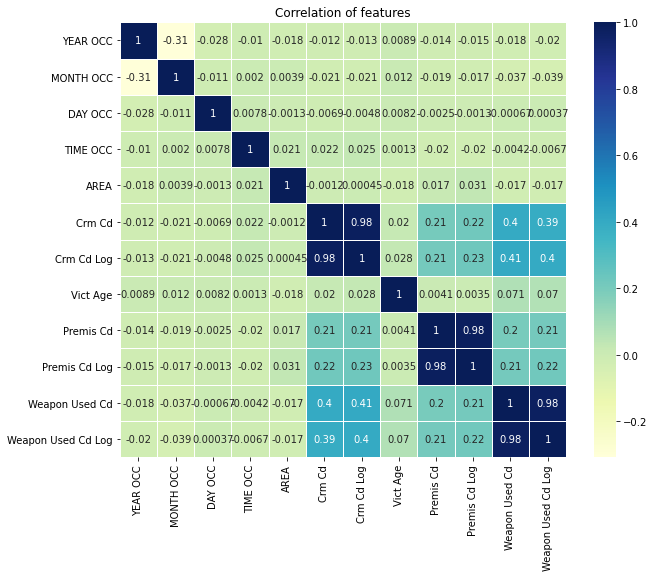

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(crimes.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

**Description**

1. We could find relatively big correlation among Crimes, Premis and Weapon Used
2. Therefore, we can those feature as main for training

In [16]:
# Process MinMaxScaling in order to make heatmap
crimes_scaled = crimes.copy()
except_features = ['MONTH OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status'] # features on this list will not be scaled
features = np.array(crimes.drop(except_features, axis=1, inplace=False).columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_scaled[feature])
    crimes_scaled[feature] = scaler.transform(crimes_scaled[feature])

crimes_scaled

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Log,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Status
0,0.0,1,0.233333,0.945293,0.10,Southwest,0.607565,0.802229,0.350515,F,B,0.459770,0.706902,0.720482,0.843456,AO
1,0.0,1,0.000000,0.139525,0.00,Central,0.607565,0.802229,0.237113,M,H,0.001149,0.004328,0.961446,0.980631,IC
2,0.0,1,0.000000,0.012299,0.00,Central,0.013002,0.043862,0.237113,F,H,0.728736,0.876629,0.961446,0.980631,IC
3,0.0,9,0.366667,0.012299,0.85,Southeast,0.969267,0.987214,0.195876,F,B,0.000000,0.000000,0.987952,0.994012,IC
4,0.0,1,0.100000,0.932570,0.00,Central,0.260047,0.507173,0.278351,M,A,0.000000,0.000000,0.493976,0.678883,IC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107453,1.0,3,0.133333,0.387617,0.05,Rampart,0.607565,0.802229,0.536082,F,H,0.000000,0.000000,0.961446,0.980631,IC
107454,1.0,5,0.800000,0.344360,0.25,Hollywood,0.607565,0.802229,0.319588,M,B,0.039080,0.127610,0.990361,0.995215,IC
107455,1.0,7,0.100000,0.905004,1.00,Topanga,0.607565,0.802229,0.432990,M,W,0.000000,0.000000,0.720482,0.843456,IC
107456,1.0,3,0.100000,0.936811,0.20,Harbor,0.382979,0.634003,0.402062,F,B,0.460920,0.707785,0.238554,0.417931,AA


In [17]:
# Create DataFrame processed groupby on 'Month'
crimes_month = crimes_scaled.groupby(by='MONTH OCC').mean()
crimes_month.drop(['YEAR OCC'], axis=1, inplace=True)
crimes_month

,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log
MONTH OCC,,,,,,,,,,
1,0.491460,0.571568,0.476057,0.480635,0.652111,0.362134,0.247491,0.379907,0.641828,0.739514
2,0.461985,0.575548,0.474779,0.486253,0.656556,0.359812,0.247318,0.377609,0.653755,0.751319
3,0.487324,0.583009,0.478455,0.481204,0.653131,0.364019,0.254408,0.389423,0.648980,0.748436
4,0.489747,0.581326,0.483420,0.473316,0.645168,0.371256,0.247238,0.380842,0.637737,0.736779
5,0.500670,0.574037,0.480753,0.474591,0.647087,0.366069,0.241488,0.373079,0.636409,0.736166
6,0.488973,0.575105,0.487710,0.475631,0.646699,0.369769,0.236994,0.366212,0.632990,0.731958
7,0.489272,0.572250,0.478506,0.469528,0.641941,0.372369,0.234302,0.362329,0.633984,0.733253
8,0.416504,0.567058,0.479356,0.474803,0.646743,0.368454,0.237072,0.363961,0.627916,0.726960
9,0.483907,0.579828,0.483840,0.471934,0.642482,0.369692,0.237951,0.367726,0.625399,0.722760


<AxesSubplot:title={'center':'Correlation of Crimes by Month'}, ylabel='MONTH OCC'>

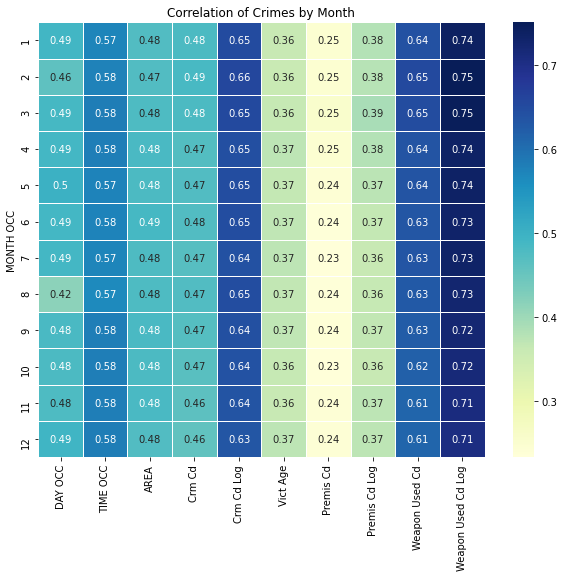

In [18]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of Crimes by Month')
sns.heatmap(crimes_month, annot=True, linewidths=.5, cmap="YlGnBu")

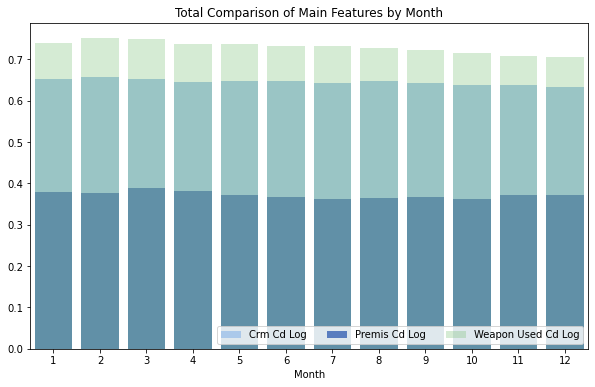

In [19]:
# Plot barplot
crimes_month = crimes_scaled.groupby(by='MONTH OCC', as_index=False).mean()
crimes_month.drop(['YEAR OCC'], axis=1, inplace=True)

sns.set_theme="whitegrid"
f, ax = plt.subplots(figsize=(10, 6))

## Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="MONTH OCC", y="Crm Cd Log", data=crimes_month, label="Crm Cd Log", color="b")

## Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="MONTH OCC", y="Premis Cd Log", data=crimes_month, label="Premis Cd Log", color="b")

## Plot 'Weapon Used Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="MONTH OCC", y="Weapon Used Cd Log", data=crimes_month, label="Weapon Used Cd Log", color="g", alpha=0.3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Month")
plt.title("Total Comparison of Main Features by Month")

plt.show()

**Description**
1. Grouping by month, we could compare features.
2. Especially, on August, crime rates was little bit smaller than any other months.

In [20]:
# Process MinMaxScaling in order to make heatmap
crimes_scaled = crimes.copy()
except_features = ['DAY OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status'] # features on this list will not be scaled
features = np.array(crimes.drop(except_features, axis=1, inplace=False).columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_scaled[feature])
    crimes_scaled[feature] = scaler.transform(crimes_scaled[feature])

In [21]:
# Create DataFrame processed groupby on 'Day'
crimes_day = crimes_scaled.groupby(by='DAY OCC').mean()
crimes_day.drop(['YEAR OCC'], axis=1, inplace=True)
crimes_day

,MONTH OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log
DAY OCC,,,,,,,,,,
1,0.416522,0.526675,0.492287,0.489886,0.654272,0.346272,0.265405,0.407498,0.639308,0.739798
2,0.431586,0.580179,0.483634,0.473252,0.646326,0.367349,0.235032,0.362641,0.622652,0.721240
3,0.439493,0.583728,0.480028,0.479137,0.649686,0.370533,0.244334,0.378275,0.643138,0.740229
4,0.433546,0.586611,0.474646,0.481042,0.653237,0.368372,0.235793,0.362157,0.631527,0.728786
5,0.437294,0.578115,0.480761,0.466655,0.637664,0.367116,0.238463,0.366949,0.636243,0.732626
6,0.431446,0.584397,0.470374,0.467842,0.640939,0.368599,0.237820,0.364664,0.629583,0.727701
7,0.437914,0.579084,0.477343,0.472755,0.645435,0.369431,0.241189,0.368691,0.634911,0.732607
8,0.431184,0.577650,0.475768,0.478489,0.650333,0.368162,0.241259,0.371459,0.643519,0.742027
9,0.437064,0.585169,0.488678,0.472688,0.645289,0.370141,0.240399,0.368704,0.635378,0.732413


<AxesSubplot:title={'center':'Correlation of Crimes by Day'}, ylabel='DAY OCC'>

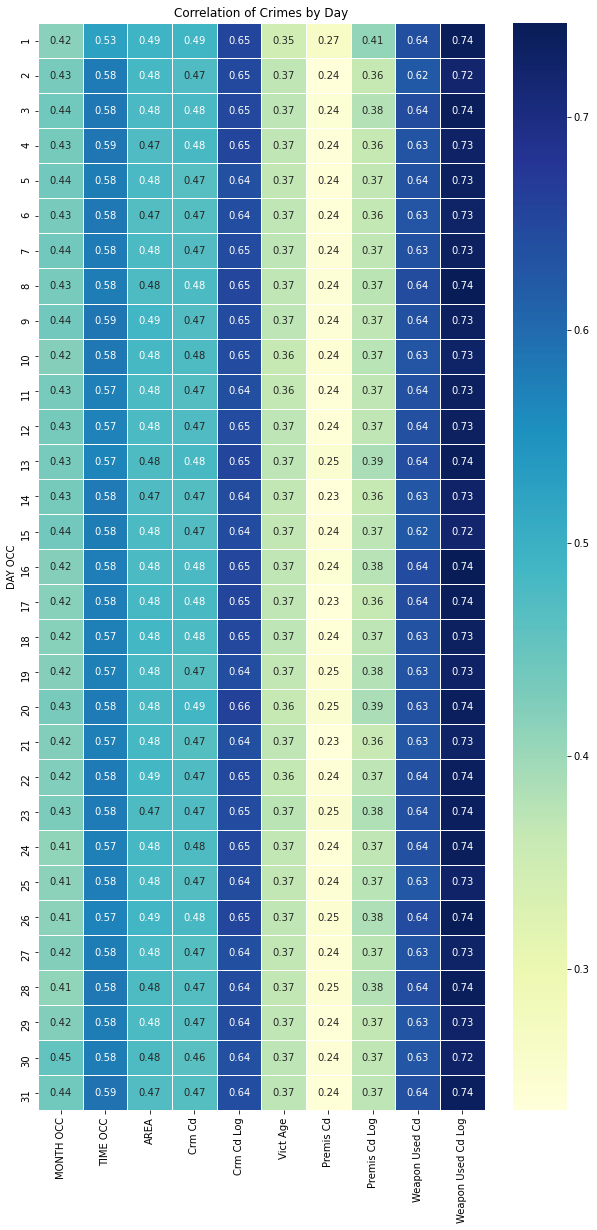

In [22]:
# Plot heatmap
plt.figure(figsize=(10, 20))
plt.title('Correlation of Crimes by Day')
sns.heatmap(crimes_day, annot=True, linewidths=.5, cmap="YlGnBu")

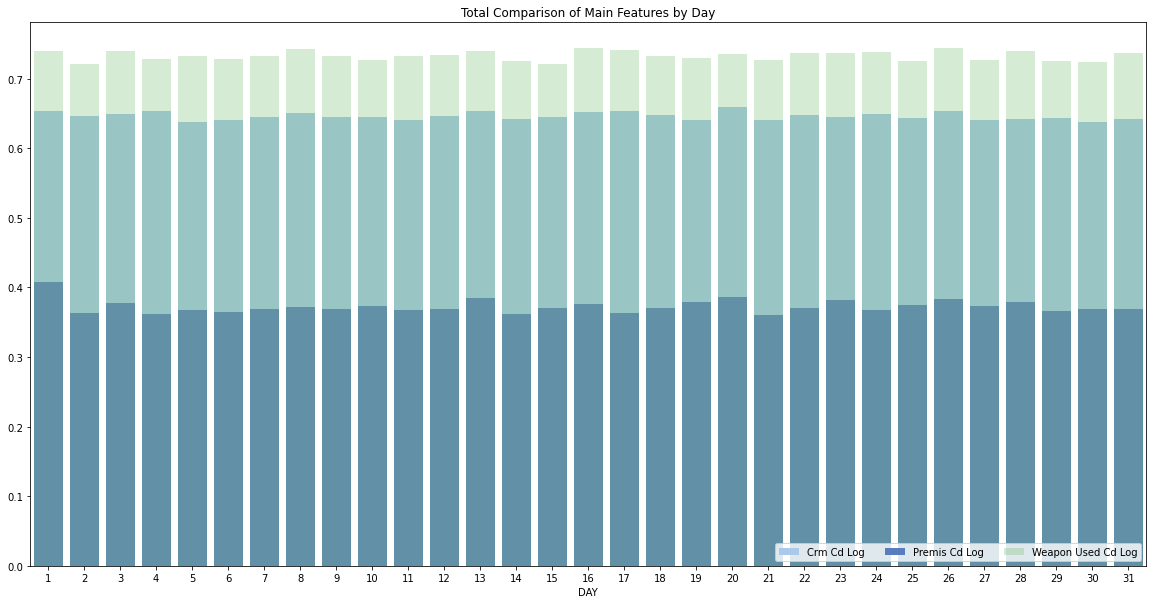

In [23]:
# Plot barplot
crimes_day = crimes_scaled.groupby(by='DAY OCC', as_index=False).mean()
crimes_day.drop(['YEAR OCC'], axis=1, inplace=True)

sns.set_theme="whitegrid"
f, ax = plt.subplots(figsize=(20, 10))

## Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="DAY OCC", y="Crm Cd Log", data=crimes_day, label="Crm Cd Log", color="b")

## Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Premis Cd Log", data=crimes_day, label="Premis Cd Log", color="b")

## Plot 'Weapon Used Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Weapon Used Cd Log", data=crimes_day, label="Weapon Used Cd Log", color="g", alpha=0.3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="DAY")
plt.title("Total Comparison of Main Features by Day")

plt.show()

**Description**

1. As you saw on distribution of 'DAY OCC', the distribution of it was homogeneous.
2. Crime Codes and Weapon Used Codes was also high like previous one.

# Split Datasets

In [24]:
crimes_train = crimes.drop(['AREA NAME', 'Vict Descent', 'Status'] ,axis=1, inplace=False)
crimes_train = pd.get_dummies(crimes_train)
crimes_train

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X
0,2020,1,8,2230,3,624,6.437752,36,501.0,6.218600,400.0,5.993961,1,0,0,0
1,2020,1,1,330,1,624,6.437752,25,102.0,4.634729,500.0,6.216606,0,0,1,0
2,2020,1,1,30,1,121,4.804021,25,735.0,6.601230,500.0,6.216606,1,0,0,0
3,2020,9,12,30,18,930,6.836259,21,101.0,4.624973,511.0,6.238325,1,0,0,0
4,2020,1,4,2200,1,330,5.802118,29,101.0,4.624973,306.0,5.726848,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107453,2021,3,5,915,2,624,6.437752,54,101.0,4.624973,500.0,6.216606,1,0,0,0
107454,2021,5,25,813,6,624,6.437752,33,135.0,4.912655,512.0,6.240276,0,0,1,0
107455,2021,7,4,2135,21,624,6.437752,44,101.0,4.624973,400.0,5.993961,0,0,1,0
107456,2021,3,4,2210,5,434,6.075346,41,502.0,6.220590,200.0,5.303305,1,0,0,0


In [25]:
# MinMax Scaling of DataFrame
features = np.array(crimes_train.columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_train[feature])
    crimes_train[feature] = scaler.transform(crimes_train[feature])

crimes_train

,YEAR OCC,MONTH OCC,DAY OCC,TIME OCC,AREA,Crm Cd,Crm Cd Log,Vict Age,Premis Cd,Premis Cd Log,Weapon Used Cd,Weapon Used Cd Log,Vict Sex_F,Vict Sex_H,Vict Sex_M,Vict Sex_X
0,0.0,0.000000,0.233333,0.945293,0.10,0.607565,0.802229,0.350515,0.459770,0.706902,0.720482,0.843456,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.139525,0.00,0.607565,0.802229,0.237113,0.001149,0.004328,0.961446,0.980631,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.012299,0.00,0.013002,0.043862,0.237113,0.728736,0.876629,0.961446,0.980631,1.0,0.0,0.0,0.0
3,0.0,0.727273,0.366667,0.012299,0.85,0.969267,0.987214,0.195876,0.000000,0.000000,0.987952,0.994012,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.100000,0.932570,0.00,0.260047,0.507173,0.278351,0.000000,0.000000,0.493976,0.678883,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107453,1.0,0.181818,0.133333,0.387617,0.05,0.607565,0.802229,0.536082,0.000000,0.000000,0.961446,0.980631,1.0,0.0,0.0,0.0
107454,1.0,0.363636,0.800000,0.344360,0.25,0.607565,0.802229,0.319588,0.039080,0.127610,0.990361,0.995215,0.0,0.0,1.0,0.0
107455,1.0,0.545455,0.100000,0.905004,1.00,0.607565,0.802229,0.432990,0.000000,0.000000,0.720482,0.843456,0.0,0.0,1.0,0.0
107456,1.0,0.181818,0.100000,0.936811,0.20,0.382979,0.634003,0.402062,0.460920,0.707785,0.238554,0.417931,1.0,0.0,0.0,0.0


In [26]:
# Define features and label for training
train_features = crimes[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'Vict Age', 'Premis Cd Log', 'Weapon Used Cd Log']]
train_label = crimes['Crm Cd Log'].astype(int)

In [27]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (85966, 8)
Shape of X_test:  (21492, 8)
Shape of y_train:  (85966,)
Shape of y_test:  (21492,)


# Regression

## Logistic Regression

In [28]:
# Logistic Regression is one of the most fundamental estimator.
# So, let's try with Logistic Regression, first.

lr_reg = LogisticRegression(solver='liblinear')
lr_reg.fit(X_train, y_train)
lr_preds = lr_reg.predict(X_test)
lr_preds_proba = lr_reg.predict_proba(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(lr_mse, lr_mse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, lr_preds)))
print('Accuracy Score : {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('ROC_AUC Score : {0:.3f}'.format(roc_auc_score(y_test, lr_preds_proba, multi_class='ovr')))

MSE : 0.317, RMSE : 0.317
Variance Score : -0.149
Accuracy Score : 0.722
ROC_AUC Score : 0.717


In [29]:
# Optimize for Logistic Regression Model
params = {'penalty' : ['l2', 'l1'], 'C' : [0.01, 0.1, 1, 1, 5, 10]}

grid_lr = GridSearchCV(lr_reg, param_grid=params, scoring='accuracy', cv=3)
grid_lr.fit(train_features, train_label)
print('The Best Hyperparameter for Optimization : {}'.format(grid_lr.best_params_))
print('The Accuracy Score of Averages for Optimization : {0:.3f}'.format(grid_lr.best_score_))

The Best Hyperparameter for Optimization : {'C': 1, 'penalty': 'l1'}
The Accuracy Score of Averages for Optimization : 0.723


## Various Estimators

In [30]:
# Utility Function
def get_model_cv_prediction(model, X_data, y_target, cv):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=cv)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print('Average RMSE scores of Cross Validation {0} times : {1:.3f} '.format(cv, avg_rmse))

In [31]:
# Create Regresion estimators
dt_reg = DecisionTreeRegressor(random_state=11, max_depth=4)
rf_reg = RandomForestRegressor(random_state=11, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=11, n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [32]:
# Repeat prediction and evaluation
models = [dt_reg, rf_reg, gb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data=train_features, y_target=train_label, cv=5)

#####  DecisionTreeRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.457 
#####  RandomForestRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.459 
#####  GradientBoostingRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.447 
#####  LGBMRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.452 


Text(0.5, 1.0, 'Feature Importances by RandomForestRegressor')

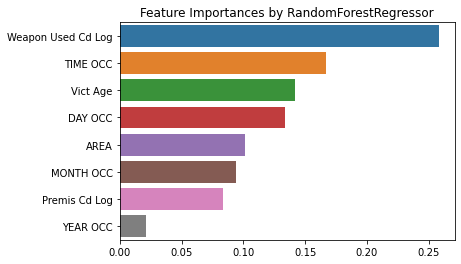

In [33]:
# Plot 'feature importances'
rf_reg.fit(train_features, train_label)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=train_features.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.title('Feature Importances by RandomForestRegressor')

# Inspiration

List of AREA unique values : 
 [ 3  1 18 17  5 19 10 14  7 15  4  6 11 12 21 16  8  2 13  9 20]
List of AREA NAME unique values : 
 ['Southwest' 'Central' 'Southeast' 'Devonshire' 'Harbor' 'Mission'
 'West Valley' 'Pacific' 'Wilshire' 'N Hollywood' 'Hollenbeck' 'Hollywood'
 'Northeast' '77th Street' 'Topanga' 'Foothill' 'West LA' 'Rampart'
 'Newton' 'Van Nuys' 'Olympic']


[ANSWER]
The mostly affected community : 77th Street


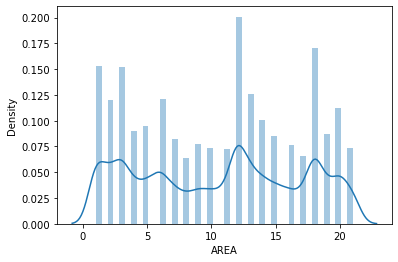

In [34]:
# Which community mostly get effected my crime?
sns.distplot(crimes['AREA'])
print("List of AREA unique values : \n", crimes['AREA'].unique())
print("List of AREA NAME unique values : \n", crimes['AREA NAME'].unique())
print("\n")
print("[ANSWER]")
print("The mostly affected community : 77th Street")

[Answer]
People of 30s were most affected to crimes
People of about 70s were less affted to crimes


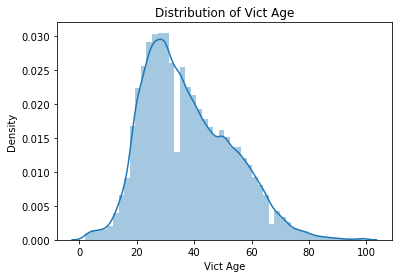

In [35]:
# Which Age of people are most and least affected?
sns.distplot(crimes['Vict Age'])
plt.title('Distribution of Vict Age')
print("[Answer]")
print("People of 30s were most affected to crimes")
print("People of about 70s were less affted to crimes")